In [2]:
import grid2op
from grid2op.PlotGrid import PlotMatplot
from lightsim2grid import LightSimBackend
import matplotlib.pyplot as plt
import os

In [3]:
path = "/Users/ericavandersar/surfdrive/Documents/Research/Results_SurveyPaper"
env = grid2op.make("rte_case5_example", test=True, backend=LightSimBackend())

/Users/ericavandersar/anaconda3/envs/l2rpn2023_env/lib/python3.11/site-packages/grid2op/MakeEnv/Make.py:415: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


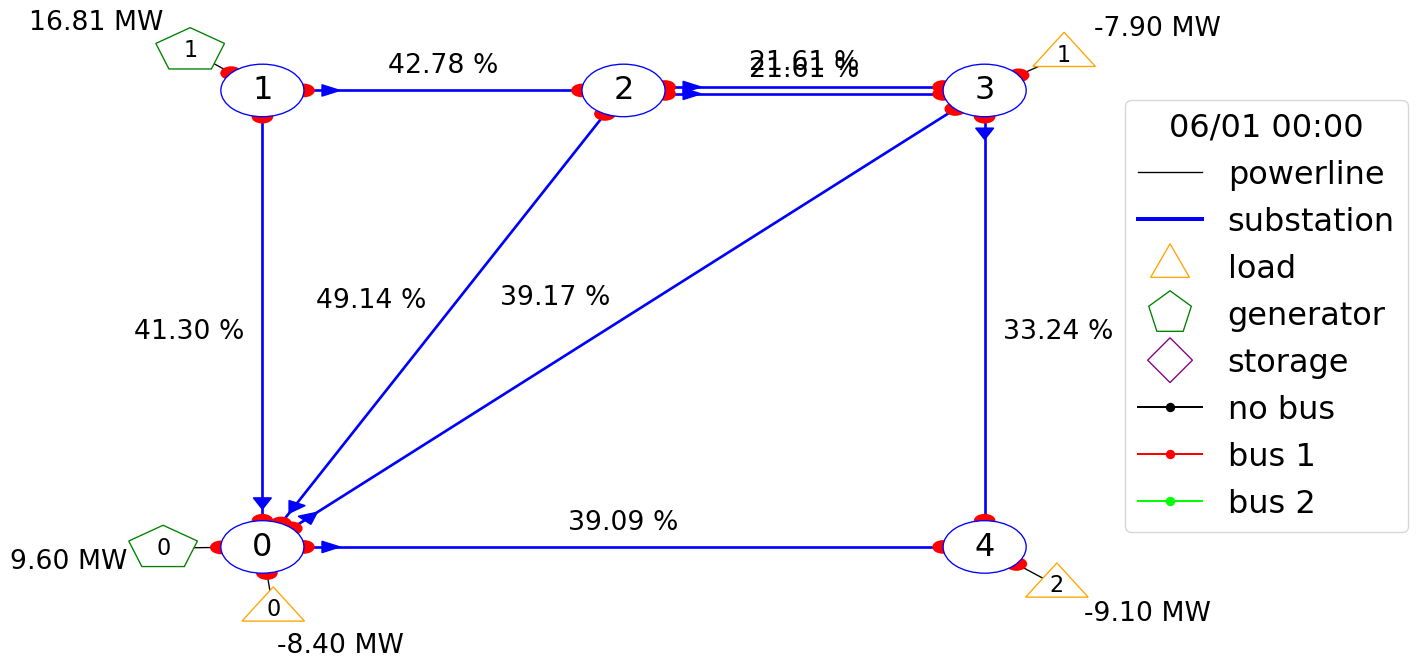

In [13]:
from grid2op.PlotGrid.config import *
plt.rcParams.update({'font.size': 24})
plot_helper = PlotMatplot(env.observation_space) 
plot_helper._line_color_width = 2
# plot_helper._display_gen_value = False
plot_helper.assign_gen_palette(
            nb_color=0,
            increase_gen_size=2.5,
        )
plot_helper._load_radius = 20
plot_helper._sub_radius = 23
obs = env.reset()
figure = plot_helper.plot_obs(obs)
legend = plot_helper.legend
legend.set_bbox_to_anchor((1, 0.9)) 
plt.savefig(os.path.join(path, f'Case5_Figure1.svg'))

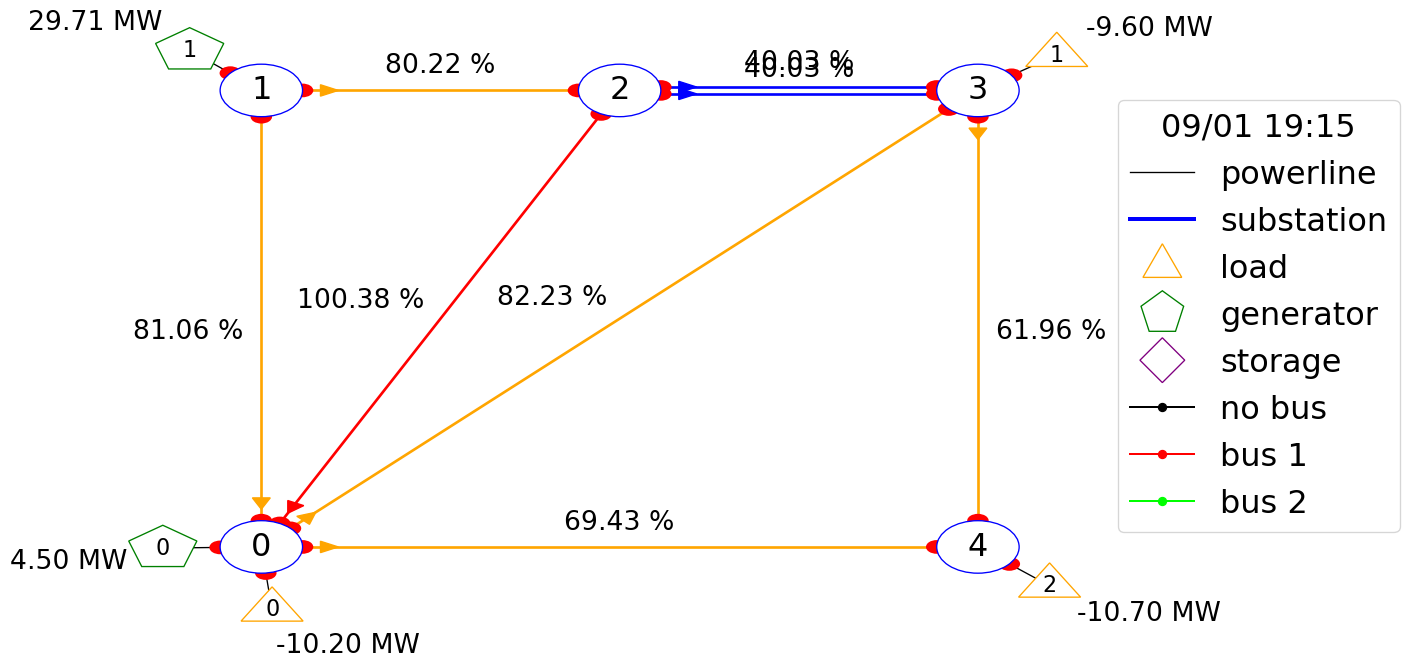

In [14]:
while obs.rho.max() < 1:
    obs, *_ = env.step(env.action_space())
figure = plot_helper.plot_obs(obs)
legend = plot_helper.legend
legend.set_bbox_to_anchor((1, 0.9)) 
plt.savefig(os.path.join(path, f'Case5_Figure1.svg'))

In [15]:
# perform an action to split substation 0 on two buses
sub_id = 0
action = env.action_space({"set_bus": {"substations_id": [(sub_id, [2, 2, 2, 1, 2, 1])]}})
print(action)
new_obs, *_ = env.step(action)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (origin) id 0 [on substation 0]
	 	 - Assign bus 2 to line (origin) id 1 [on substation 0]
	 	 - Assign bus 2 to line (origin) id 2 [on substation 0]
	 	 - Assign bus 1 to line (origin) id 3 [on substation 0]
	 	 - Assign bus 2 to generator id 0 [on substation 0]
	 	 - Assign bus 1 to load id 0 [on substation 0]


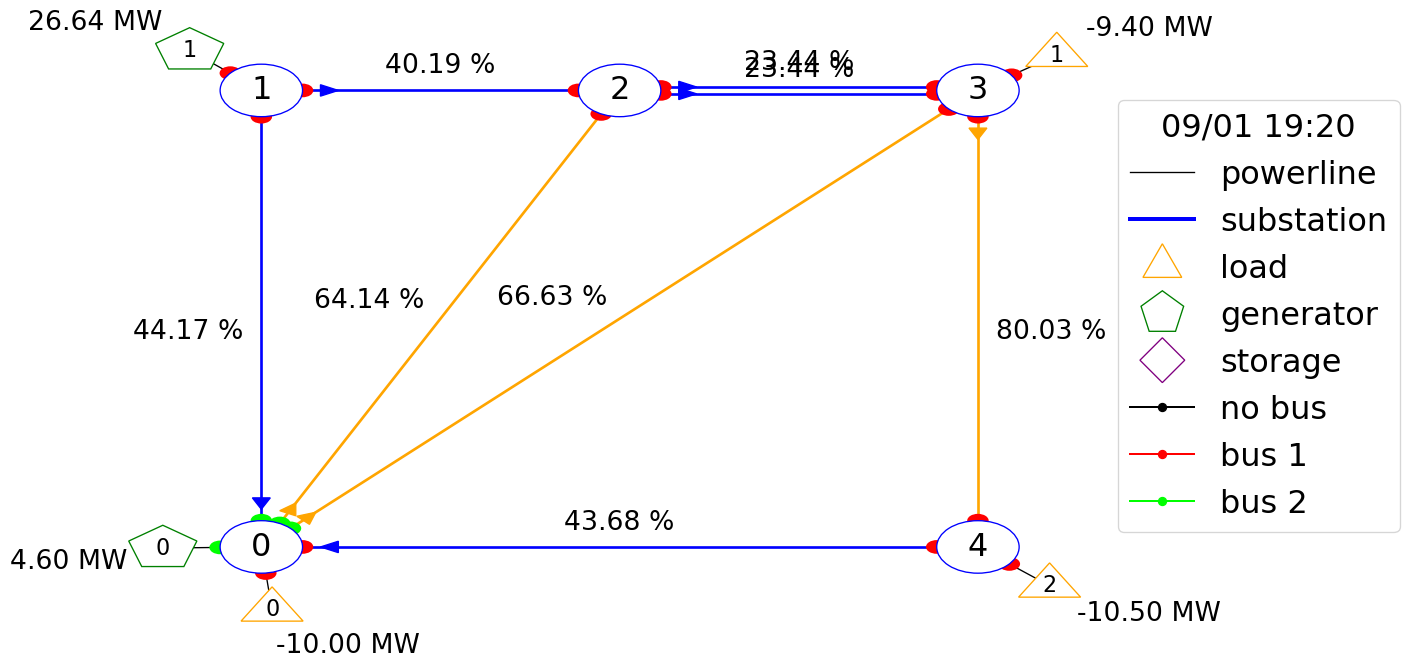

In [16]:
from grid2op.PlotGrid.config import *
plt.rcParams.update({'font.size': 24})
plot_helper = PlotMatplot(env.observation_space) 
plot_helper._line_color_width = 2
plot_helper.assign_gen_palette(
            nb_color=0,
            increase_gen_size=2.5,
        )
plot_helper._load_radius = 20
plot_helper._sub_radius = 23

figure = plot_helper.plot_obs(new_obs)
legend = plot_helper.legend
legend.set_bbox_to_anchor((1, 0.9)) 
plt.savefig(os.path.join(path, f'Case5_Figure2.svg'))